In [1]:
import pandas as pd
import tensorflow as tf
import scatter_plot

#read and parse the training set .csv features file 
df = pd.read_csv('Data/Apple Quality/apple_quality_preprocessed.csv')

df.head()


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [2]:
# construct an array of arrays of 7-input features of the train set
input_train_columns = df.columns[0 : 7]
features = df[input_train_columns].values

# construct an array of size of output class labels target values
outputcolumn = df.columns[7]
labels = df[outputcolumn].values

x_train = features
y_train = labels

print(features)


[[-3.97004852 -2.51233638  5.34632961 ...  1.84490036  0.3298398
  -0.49159048]
 [-1.19521719 -2.83925653  3.66405876 ...  0.8532858   0.86753008
  -0.72280937]
 [-0.29202386 -1.35128199 -1.73842916 ...  2.83863551 -0.03803333
   2.62163647]
 ...
 [-2.6345153  -2.13824672 -2.44046129 ...  2.19970859  4.76385918
  -1.33461139]
 [-4.00800374 -1.77933711  2.36639697 ...  2.16143512  0.21448838
  -2.22971981]
 [ 0.27853965 -1.71550503  0.12121725 ...  1.2666774  -0.77657147
   1.59979646]]


In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.20, random_state= 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 7)
(800, 7)
(3200,)
(800,)


In [4]:
import tensorflow as tf
import keras as keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7, activation="sigmoid"),
    tf.keras.layers.Dense(3, activation="sigmoid"),
    tf.keras.layers.Dense(1),
])

sgd = tf.keras.optimizers.SGD(lr = 0.1, momentum = 0.9)
model.compile(optimizer=sgd, loss = "mse", metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=140, verbose="2", validation_split=0.2)

Epoch 1/140
Epoch 2/140
Epoch 3/140
Epoch 4/140
Epoch 5/140
Epoch 6/140
Epoch 7/140
Epoch 8/140
Epoch 9/140
Epoch 10/140
Epoch 11/140
Epoch 12/140
Epoch 13/140
Epoch 14/140
Epoch 15/140
Epoch 16/140
Epoch 17/140
Epoch 18/140
Epoch 19/140
Epoch 20/140
Epoch 21/140
Epoch 22/140
Epoch 23/140
Epoch 24/140
Epoch 25/140
Epoch 26/140
Epoch 27/140
Epoch 28/140
Epoch 29/140
Epoch 30/140
Epoch 31/140
Epoch 32/140
Epoch 33/140
Epoch 34/140
Epoch 35/140
Epoch 36/140
Epoch 37/140
Epoch 38/140
Epoch 39/140
Epoch 40/140
Epoch 41/140
Epoch 42/140
Epoch 43/140
Epoch 44/140
Epoch 45/140
Epoch 46/140
Epoch 47/140
Epoch 48/140
Epoch 49/140
Epoch 50/140
Epoch 51/140
Epoch 52/140
Epoch 53/140
Epoch 54/140
Epoch 55/140
Epoch 56/140
Epoch 57/140
Epoch 58/140
Epoch 59/140
Epoch 60/140
Epoch 61/140
Epoch 62/140
Epoch 63/140
Epoch 64/140
Epoch 65/140
Epoch 66/140
Epoch 67/140
Epoch 68/140
Epoch 69/140
Epoch 70/140
Epoch 71/140
Epoch 72/140
Epoch 73/140
Epoch 74/140
Epoch 75/140
Epoch 76/140
Epoch 77/140
Epoch 78

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139]
{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.10989585>, 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.853125>}


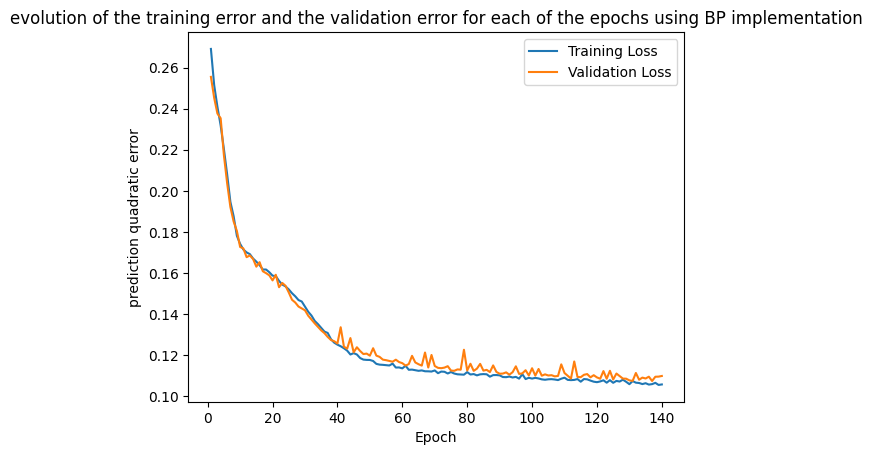

In [5]:
import matplotlib.pyplot as plt

# Inspect the history object
print(history.epoch)
epoch_list = [x + 1 for x in history.epoch]
print(model.get_metrics_result())
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the evolution of the training and validation loss
plt.plot(epoch_list, train_loss, label='Training Loss')
plt.plot(epoch_list, validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('prediction quadratic error')
plt.title('evolution of the training error and the validation error for each of the epochs using BP implementation')
plt.legend()
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139]
{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.10989585>, 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.853125>}


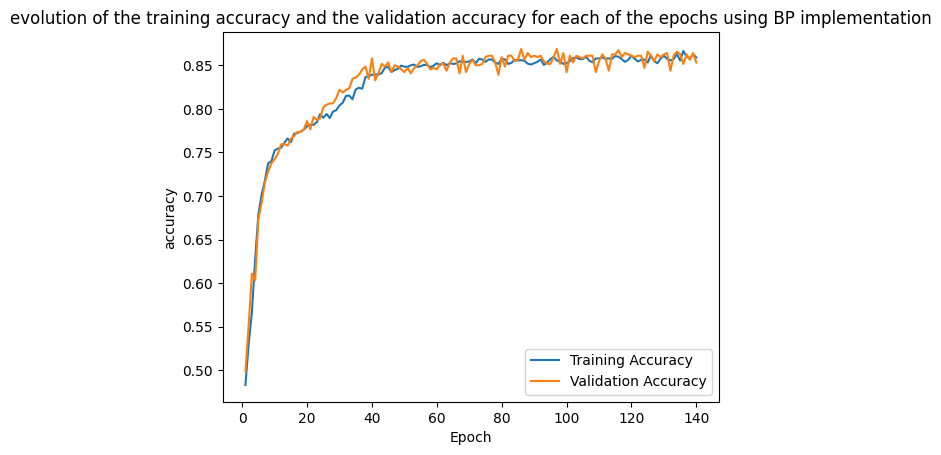

In [6]:
# Inspect the history object
print(history.epoch)
epoch_list = [x + 1 for x in history.epoch]
print(model.get_metrics_result())
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the evolution of the training and validation loss
plt.plot(epoch_list, train_accuracy, label='Training Accuracy')
plt.plot(epoch_list, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('evolution of the training accuracy and the validation accuracy for each of the epochs using BP implementation')
plt.legend()
plt.show()

100/100 [==============================] - 0s 2ms/step
[[ 5.61440706e-01]
 [ 7.31519580e-01]
 [ 6.75619006e-01]
 [ 7.41814852e-01]
 [ 1.03257775e-01]
 [ 1.05496407e+00]
 [ 1.61956668e-01]
 [ 2.50077486e-01]
 [ 7.63242483e-01]
 [ 3.11013937e-01]
 [ 1.03284550e+00]
 [ 8.93478155e-01]
 [ 2.09797621e-02]
 [ 9.03876305e-01]
 [ 9.28891420e-01]
 [ 1.08241081e-01]
 [ 2.65206933e-01]
 [ 1.62434459e-01]
 [ 7.21006274e-01]
 [ 2.66018271e-01]
 [ 1.89927697e-01]
 [-3.39335203e-02]
 [ 1.09015775e+00]
 [ 1.08403349e+00]
 [ 4.81367946e-01]
 [ 2.19053030e-01]
 [-1.29832029e-01]
 [ 6.16801858e-01]
 [ 1.05403757e+00]
 [ 1.49713159e-01]
 [ 7.58533716e-01]
 [ 3.25339556e-01]
 [-1.30056262e-01]
 [ 5.02221584e-02]
 [ 7.45653868e-01]
 [ 4.10583258e-01]
 [-9.39493179e-02]
 [ 7.58910537e-01]
 [ 6.83496833e-01]
 [ 3.83254528e-01]
 [ 2.73244023e-01]
 [ 4.18997407e-01]
 [ 6.22639656e-02]
 [ 6.59931064e-01]
 [ 3.35266948e-01]
 [ 9.10337210e-01]
 [ 6.79533005e-01]
 [ 9.46813345e-01]
 [ 7.71435857e-01]
 [-3.98696661e

Text(0.5, 1.0, 'real vs predicted values')

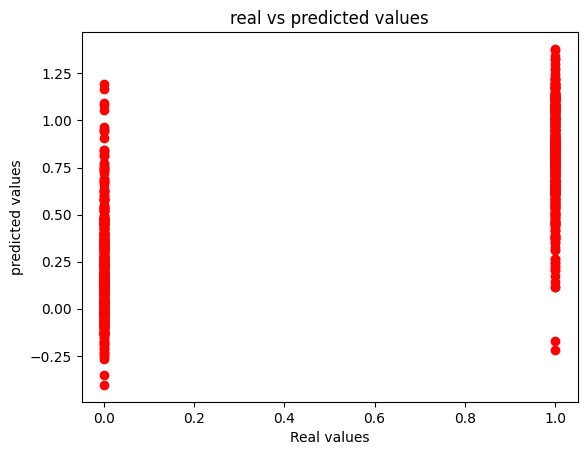

In [10]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

print(y_pred_test)
print(y_pred_train)

# scatterplot of predicted vs actual values
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred_test, color = 'red')
#plt.scatter(y_train, y_pred_train, color = 'blue')
plt.xlabel('Real values')
plt.ylabel('predicted values')
plt.title('real vs predicted values')